In [186]:
import numpy as np
import pandas as pd

In [187]:
df = pd.read_csv("../datasets/dataset.csv")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [188]:
categories = ["Marital status", "Application mode", "Course", "Daytime/evening attendance", "Previous qualification", "Nacionality", "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", "Gender", "Target"]
df = pd.get_dummies(df, columns=categories)
df

,Application order,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),...,Father's occupation_42,Father's occupation_43,Father's occupation_44,Father's occupation_45,Father's occupation_46,Gender_0,Gender_1,Target_Dropout,Target_Enrolled,Target_Graduate
0,5,1,0,0,1,0,20,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1,1,0,0,0,0,19,0,0,6,...,0,0,0,0,0,0,1,0,0,1
2,5,1,0,0,0,0,19,0,0,6,...,0,0,0,0,0,0,1,1,0,0
3,2,1,0,0,1,0,20,0,0,6,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,45,0,0,6,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,6,0,0,0,1,0,19,0,0,6,...,0,0,0,0,0,0,1,0,0,1
4420,2,1,0,1,0,0,18,1,0,6,...,0,0,0,0,0,1,0,1,0,0
4421,1,1,0,0,1,1,30,0,0,7,...,0,0,0,0,0,1,0,1,0,0
4422,1,1,0,0,1,1,20,0,0,5,...,0,0,0,0,0,1,0,0,0,1


# Model Building

## Experiment 1
Difference between including Target_Enrolled and excluding it, to improve prediction.

In [189]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [190]:
df_including = df.copy()
df_excluding = df.copy()

df_excluding = df_excluding[df.Target_Enrolled != 1]
df_excluding.head()

,Application order,Displaced,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),...,Father's occupation_42,Father's occupation_43,Father's occupation_44,Father's occupation_45,Father's occupation_46,Gender_0,Gender_1,Target_Dropout,Target_Enrolled,Target_Graduate
0,5,1,0,0,1,0,20,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1,1,0,0,0,0,19,0,0,6,...,0,0,0,0,0,0,1,0,0,1
2,5,1,0,0,0,0,19,0,0,6,...,0,0,0,0,0,0,1,1,0,0
3,2,1,0,0,1,0,20,0,0,6,...,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,45,0,0,6,...,0,0,0,0,0,1,0,0,0,1


In [191]:
for data in [df_including, df_excluding]:
    y = pd.DataFrame(data['Target_Dropout'])
    X = pd.DataFrame(data[["Curricular units 2nd sem (grade)", "Curricular units 2nd sem (approved)", "Curricular units 1st sem (grade)", "Curricular units 1st sem (approved)"]]) 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

    dectree = DecisionTreeClassifier(max_depth = 2)
    dectree.fit(X_train, y_train)     

    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)

    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", dectree.score(X_train, y_train))
    print()

    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", dectree.score(X_test, y_test))
    print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8330319469559976

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7992766726943942

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8688464364437913

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8656387665198237



This shows that predicting without the enrolled variable results in better results.

Our reasoning for removing the enrolled variable is because we do not know whether enrolled students are going to dropout or graduate, it is an intermediary state.

Therefore, by removing the enrolled variables, we can better learn from the data.

## Experiment 2
We know during the EDA, that there is an imbalance for the 'target' variable.

To fix this, we attempt using SMOTE to oversample our data.

In [192]:
from imblearn.over_sampling import SMOTE
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sb.set()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8688464364437913

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8656387665198237

Gap 	: 0.003207669923967593



<AxesSubplot: >

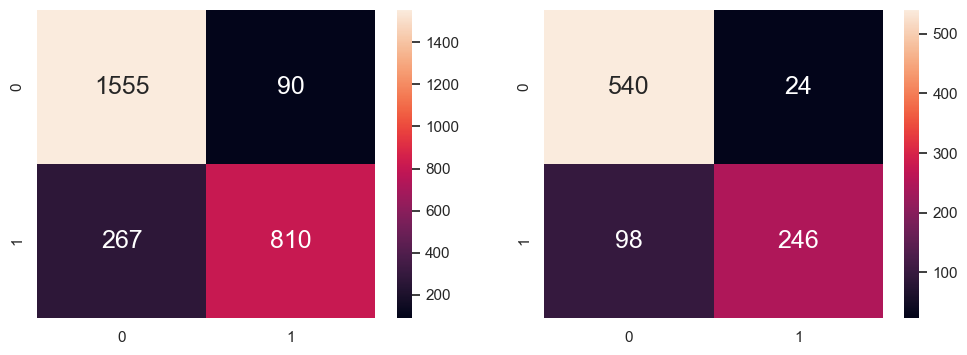

In [193]:
y = pd.DataFrame(data['Target_Dropout'])
X = pd.DataFrame(data[["Curricular units 2nd sem (grade)", "Curricular units 2nd sem (approved)", "Curricular units 1st sem (grade)", "Curricular units 1st sem (approved)"]]) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(X_train, y_train)     

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

print("Gap \t:", dectree.score(X_train, y_train) - dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8592705167173252

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8535242290748899

Gap 	: 0.005746287642435344



<AxesSubplot: >

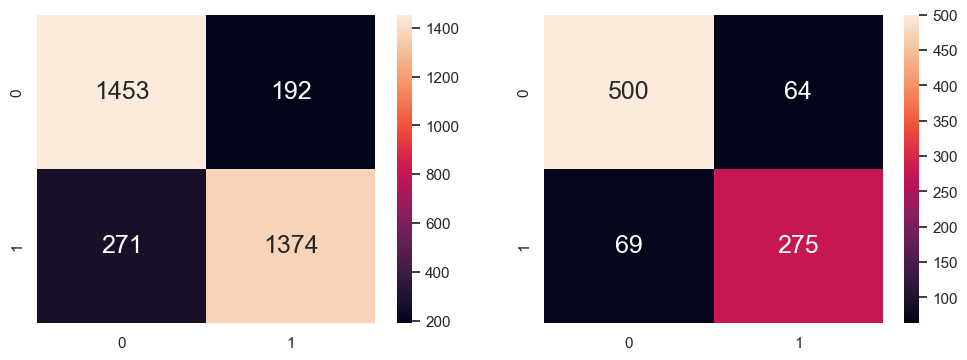

In [194]:
y = pd.DataFrame(data['Target_Dropout'])
X = pd.DataFrame(data[["Curricular units 2nd sem (grade)", "Curricular units 2nd sem (approved)", "Curricular units 1st sem (grade)", "Curricular units 1st sem (approved)"]]) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)

dectree = DecisionTreeClassifier(max_depth = 2)
dectree.fit(X_train, y_train)     

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

print("Gap \t:", dectree.score(X_train, y_train) - dectree.score(X_test, y_test))
print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

We can see that theres not too much of a difference when using SMOTE with just a depth 2 classifier,

We will then try with different models later on.

## Experiment 3
So far, we've been using depth=2 for our decision trees,

We will now use GridSearchCV together with Cross-Validation and SMOTE to fine tune and search for the best depth for our tree.

In [195]:
from sklearn.model_selection import GridSearchCV

In [201]:
y = pd.DataFrame(data['Target_Dropout'])
X = pd.DataFrame(data[["Curricular units 2nd sem (grade)", "Curricular units 2nd sem (approved)", "Curricular units 1st sem (grade)", "Curricular units 1st sem (approved)"]]) 

X, y = SMOTE(random_state=42).fit_resample(X, y)

dectree = DecisionTreeClassifier()
dectree.fit(X, y)     

DecisionTreeClassifier()

In [202]:
params = {
    'max_depth' : range(2, 30)
}
search = GridSearchCV(dectree, params, cv=10, scoring="accuracy")
search.fit(X, y)

print("Best estimator:", search.best_estimator_)
print("Best score:", search.best_score_)


Best estimator: DecisionTreeClassifier(max_depth=7)
Best score: 0.856950985522414
